# Mejora del Color en Imágenes

**Objetivo:** Entender cómo mejorar o igualar la luminosidad y el contraste de una imagen mediante técnicas de procesamiento de imágenes.

## Preparación del Entorno

Primero, debemos asegurarnos de tener las bibliotecas necesarias

In [15]:
import cv2  # Para procesamiento de imágenes
import numpy as np  # Para operaciones numéricas
import matplotlib.pyplot as plt  # Para visualización

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Cargar la Imagen

Usaremos una imagen de ejemplo que se llama `valeria.png`. Puedes cargar la imagen de la siguiente manera:

In [ ]:
!wget https://www.dropbox.com/s/v2qdaolqds93kx0/valeria.png

--2025-04-30 01:02:05--  https://www.dropbox.com/s/v2qdaolqds93kx0/valeria.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6057:18::a27d:d12
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/j9fowtyhzkkfu33di0mcf/valeria.png?rlkey=pjj5lcu17lsdqy9lqaum0s0w9 [following]
--2025-04-30 01:02:05--  https://www.dropbox.com/scl/fi/j9fowtyhzkkfu33di0mcf/valeria.png?rlkey=pjj5lcu17lsdqy9lqaum0s0w9
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc922909a76e03efe8ea398fee4d.dl.dropboxusercontent.com/cd/0/inline/CoycHccsZXUAYxCXLjKexuks2w2oeqHz-GkyNPvsocF_gyam3m2zLGrISpfYpL6U5tHjapS2JP0OQxVe2Kr06TDRwjF3ul7S18FFbUubn_REqVuMhbBbR5nad23OkF3IOf8/file# [following]
--2025-04-30 01:02:06--  https://uc922909a76e03efe8ea398fee4d.dl.dropboxusercontent.com/cd/0/inline/CoycHccsZXUAYxCXLjKexuks2

## Visualizar la Imagen Original

Es importante visualizar la imagen original para ver el cambio después de aplicar las técnicas de mejora. Usaremos `cv2` para leer la imagen y `matplotlib` para mostrarla.

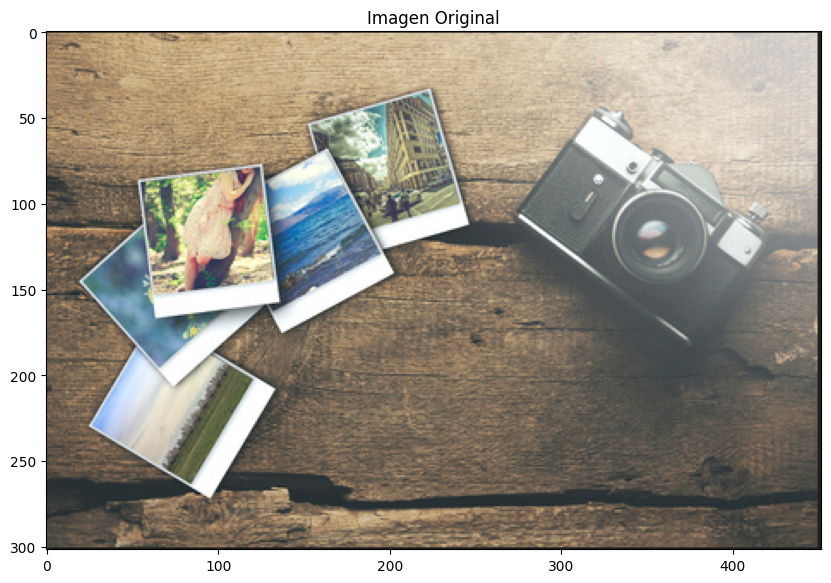

In [17]:
I = cv2.imread('/content/drive/MyDrive/Colab Notebooks/imagenes/mejorar camara 2.png')  # Cargar la imagen
plt.figure(figsize=(10, 12))  # Tamaño de la figura
plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))  # Mostrar la imagen en formato RGB
plt.title('Imagen Original')  # Título de la imagen
plt.show()  # Mostrar la figura

## Histograma de la Imagen

Los histogramas son una herramienta útil para entender la distribución de los colores (valores de píxeles) en una imagen. Vamos a crear una función que calcule y muestre el histograma para cada canal de color (Rojo, Verde, Azul).

In [18]:
def imhist3(X):
    (N, M, P) = X.shape  # Obtener dimensiones de la imagen
    n = 256  # Número de niveles de colores
    for p in range(3):  # Para cada canal de color
        h = np.zeros((256,))  # Crear un histograma vacío
        for i in range(N):  # Recorrer cada fila
            for j in range(M):  # Recorrer cada columna
                x = X[i, j, p]  # Obtener el valor del píxel
                h[x] += 1  # Incrementar el conteo en el histograma
        plt.figure(figsize=(30, 9))  # Tamaño de la figura
        plt.bar(range(n), h[0:n])  # Mostrar el histograma
        plt.title('Histograma del Canal ' + str(p))  # Título
        plt.show()  # Mostrar figura

## Analizar el Histograma de la Imagen Original

Ahora analizaremos el histograma de la imagen original para cada uno de los tres canales de color (Rojo, Verde, Azul).

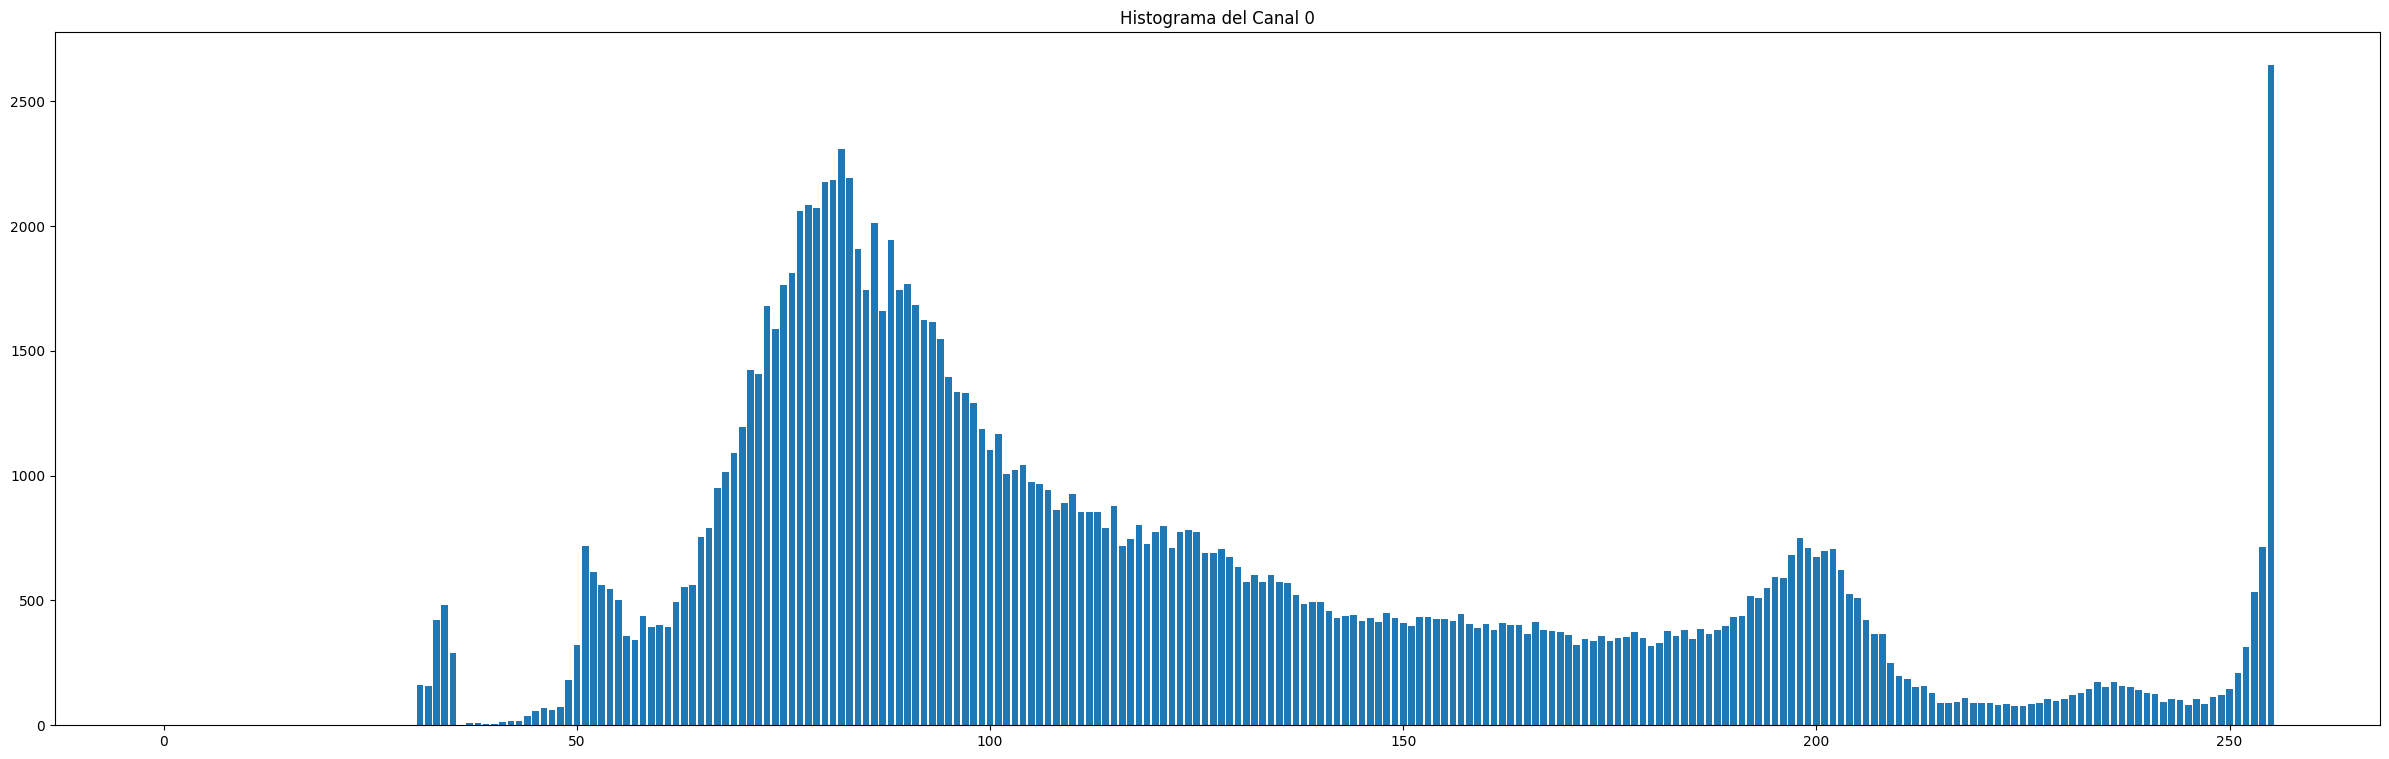

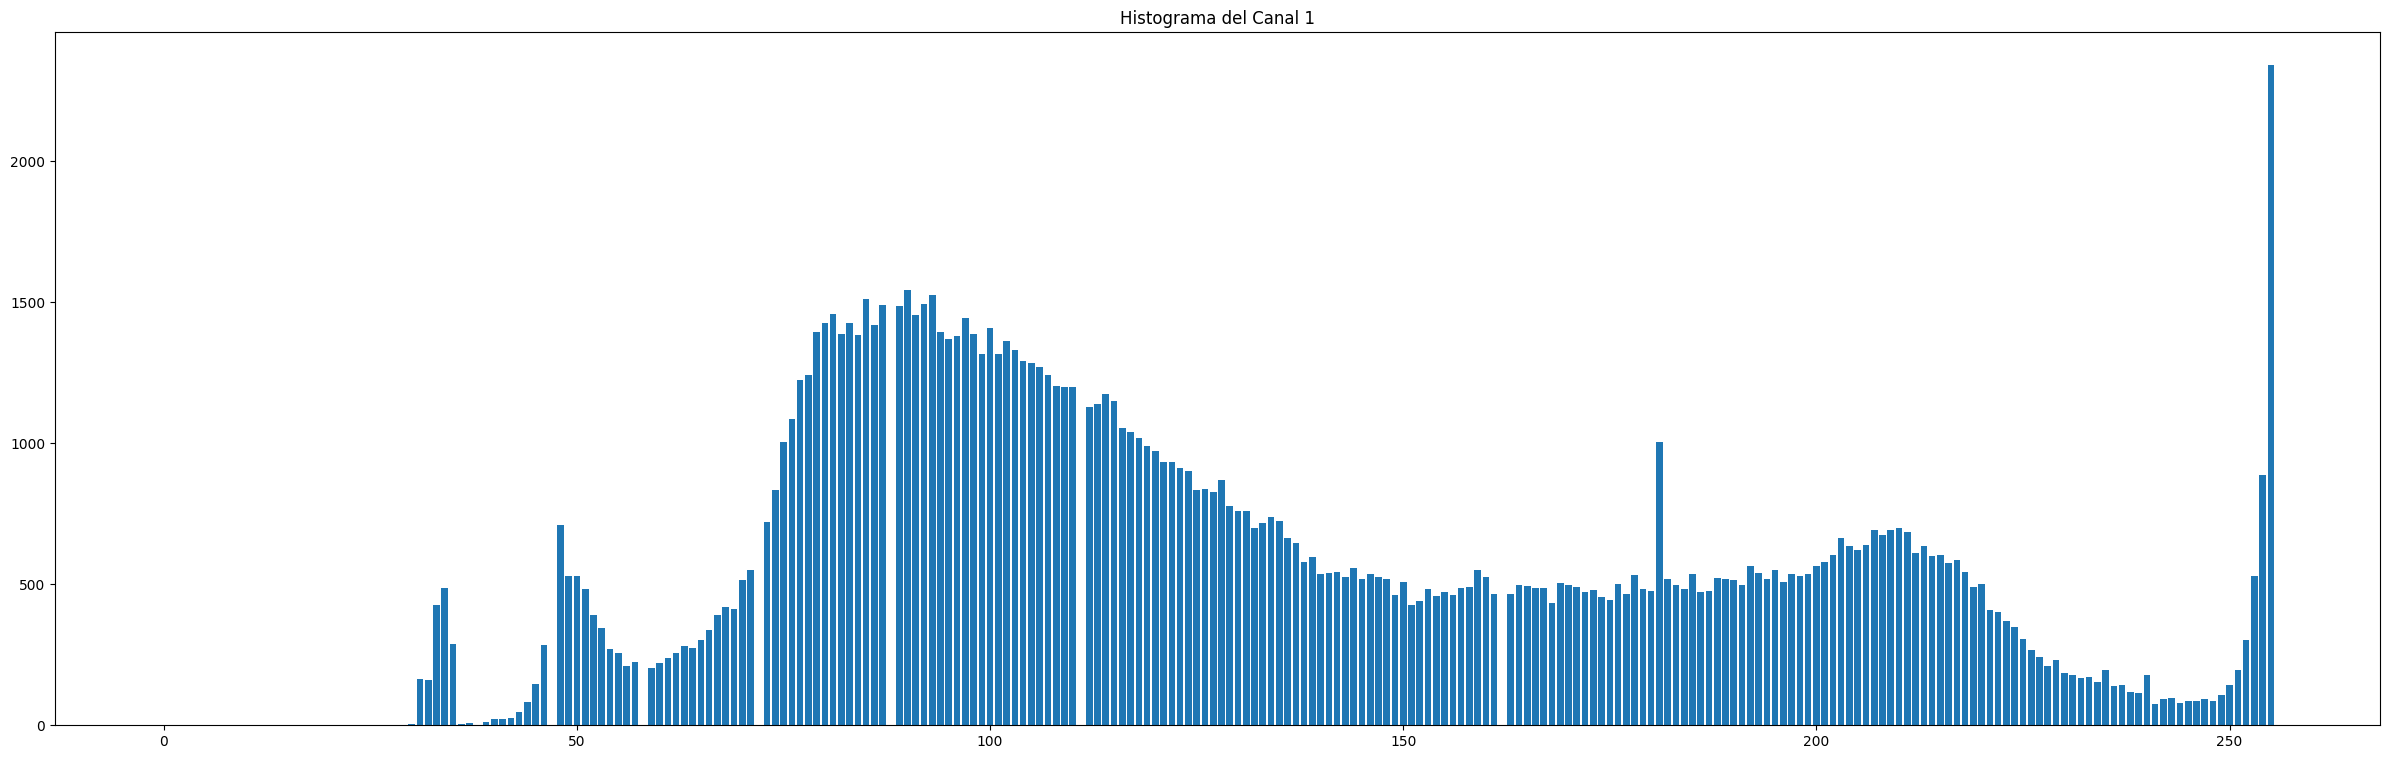

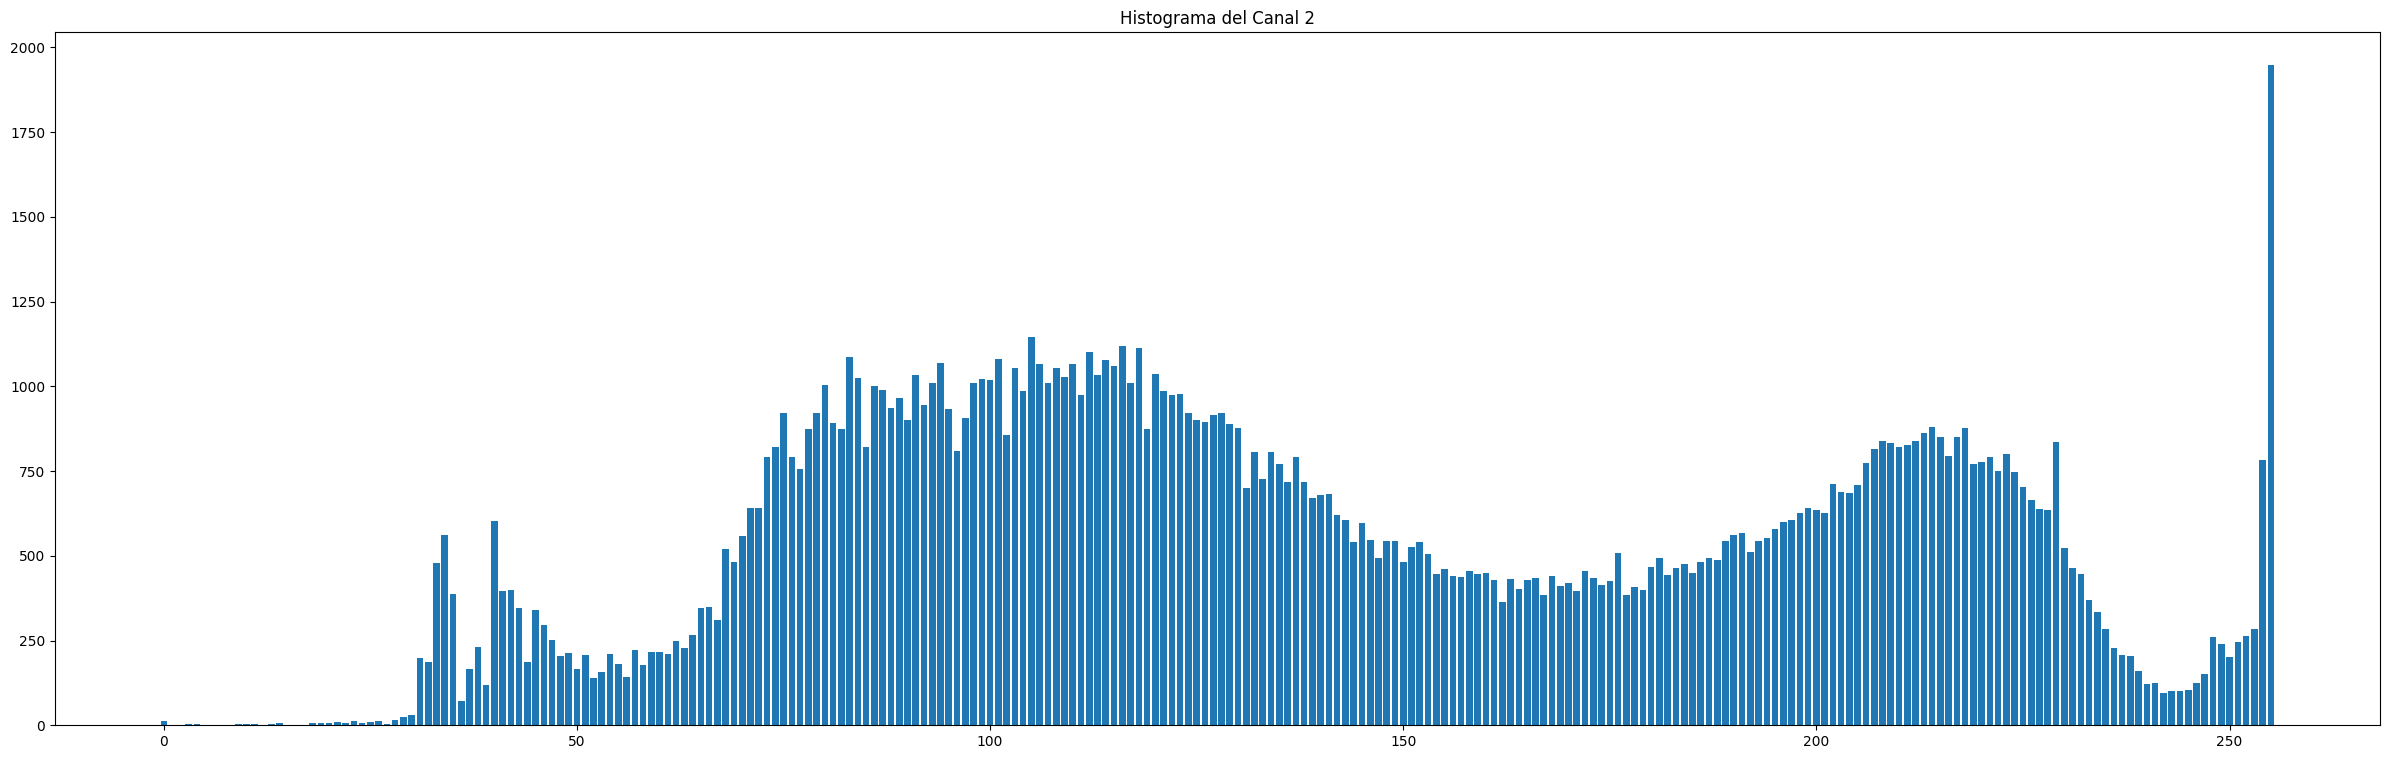

In [19]:
imhist3(I)  # Calcular y mostrar el histograma

## Ecualización de la Imagen

### Ecualización por Canal

Ahora, haremos una ecualización de los canales de color de la imagen para mejorar el contraste. Es importante mencionar que no es recomendable ecualizar cada canal de forma independiente porque puede alterar el balance de color original.

In [20]:
J = I.copy()  # Hacer una copia de la imagen original
J[:, :, 0] = cv2.equalizeHist(I[:, :, 0])  # Ecualizar el canal Rojo
J[:, :, 1] = cv2.equalizeHist(I[:, :, 1])  # Ecualizar el canal Verde
J[:, :, 2] = cv2.equalizeHist(I[:, :, 2])  # Ecualizar el canal Azul

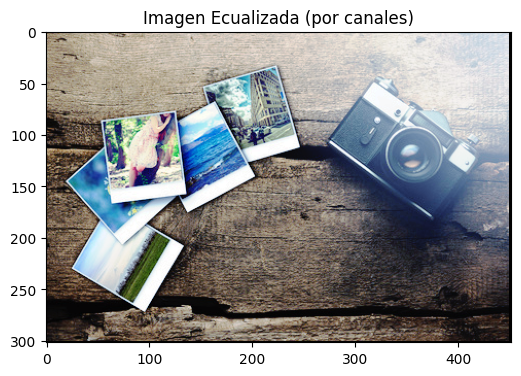

In [21]:
plt.figure(figsize=(6, 9))  # Tamaño de la figura
plt.imshow(cv2.cvtColor(J, cv2.COLOR_BGR2RGB))  # Mostrar la imagen ecualizada
plt.title('Imagen Ecualizada (por canales)')  # Título
plt.show()  # Mostrar

## Cómo funciona `cv2.equalizeHist()` internamente:

La función `cv2.equalizeHist()` realiza automáticamente la ecualización del histograma.  Estos son los pasos que realiza internamente:

1. **Calcula el histograma:** Determina la distribución de los valores de los píxeles en el canal especificado.
2. **Calcula la función de transformación:** Genera una función que mapeará los valores de píxeles originales a nuevos valores para lograr una distribución más uniforme.
3. **Aplica la transformación:** Modifica los valores de los píxeles de la imagen utilizando la función de transformación calculada.

Por lo tanto, no necesitas realizar cálculos manuales ni determinar la transformación adecuada. La función `cv2.equalizeHist()` lo hace automáticamente por ti.

### Ecualización Sobre el Canal de Brillo (Valor)

Ahora, para obtener mejores resultados, realizaremos la ecualización solo sobre el canal de brillo (V en el espacio de color HSV). Esto minimizará el cambio en el color pero mejorará la luminosidad y el contraste.

#### Convertir a HSV y Ecualizar

In [22]:
K = I.copy()  # Hacer una copia de la imagen original
Khsv = cv2.cvtColor(K, cv2.COLOR_BGR2HSV)  # Convertir a HSV
Khsv[:, :, 2] = cv2.equalizeHist(Khsv[:, :, 2])  # Ecualizar el canal de brillo (V)
Knew = cv2.cvtColor(Khsv, cv2.COLOR_HSV2BGR)  # Convertir de nuevo a BGR

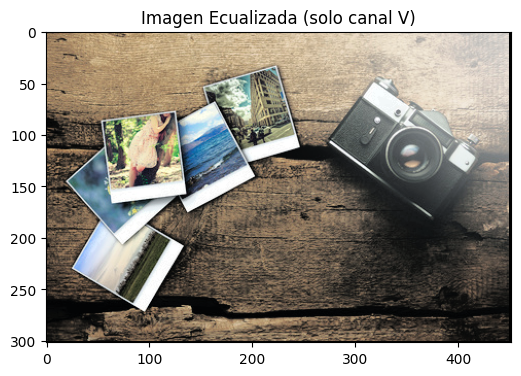

In [23]:
plt.figure(figsize=(6, 9))  # Tamaño de la figura
plt.imshow(cv2.cvtColor(Knew, cv2.COLOR_BGR2RGB))  # Mostrar la imagen ecualizada
plt.title('Imagen Ecualizada (solo canal V)')  # Título
plt.show()  # Mostrar figura

### Convertir a Espacio de Color Lab

Finalmente, convertiremos la imagen ecualizada al espacio de color Lab, que descompone la imagen en un canal de luminancia y dos canales de color.

In [24]:
lab_image = cv2.cvtColor(Knew, cv2.COLOR_BGR2LAB)  # Convertir a Lab
L, A, B = cv2.split(lab_image)  # Separar los canales

#### Visualizar los Canales del Espacio Lab

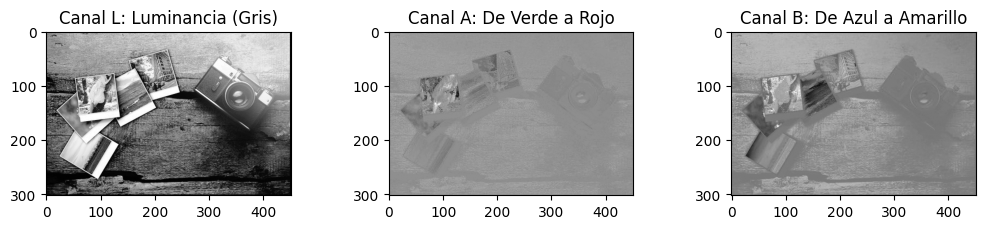

In [28]:
plt.figure(figsize=(12, 4))  # Tamaño de la figura (ajustable)

plt.subplot(1, 3, 1)
plt.imshow(L, cmap='gray')
plt.title('Canal L: Luminancia (Gris)')

plt.subplot(1, 3, 2)
plt.imshow(A, cmap='gray')
plt.title('Canal A: De Verde a Rojo')

plt.subplot(1, 3, 3)
plt.imshow(B, cmap='gray')
plt.title('Canal B: De Azul a Amarillo')

plt.subplots_adjust(wspace=0.4)  # Aumentar el espacio horizontal
plt.show()


### ¿Para qué sirve el espacio de color Lab?

El espacio de color Lab es un modelo de color que se considera perceptualmente uniforme, lo que significa que las diferencias de color que percibe el ojo humano se representan con mayor precisión mediante diferencias numéricas en el espacio Lab en comparación con otros espacios de color como RGB o HSV.

* Canal L: Representa la luminancia o brillo de la imagen. Es una escala de grises que va desde el negro (0) al blanco (100).
* Canal A: Representa el color en un rango que va del verde al rojo.
* Canal B: Representa el color en un rango que va del azul al amarillo.

###¿Por qué se usa en este contexto?

En el contexto de la mejora del color en imágenes, convertir a Lab y separar los canales puede ser útil para:

* Ajustar la luminancia (brillo) de forma independiente: Al tener el canal L separado, puedes realizar ajustes específicos de brillo sin afectar los colores de la imagen.
* Realizar análisis de color más precisos: El espacio Lab es más adecuado para analizar y comparar colores de forma perceptualmente uniforme.
* Aplicar técnicas de mejora de color más sofisticadas: Algunos algoritmos de mejora de color funcionan mejor en el espacio Lab debido a su uniformidad perceptual.

En resumen, la conversión a Lab y la separación de canales te brindan mayor control y flexibilidad para manipular y mejorar los distintos aspectos del color de una imagen.